In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
insurance=pd.read_csv('/content/insurance.csv')

In [ ]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
insurance.shape
#number of rows and columns in the data set

(1338, 7)

In [ ]:
sns.set(rc={"figure.figsize":(6,6)})
#determined my plots size

In [ ]:
insurance.info()
#as it is seen no null type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# Perform An Exploratory Data Analysis


Text(0, 0.5, 'frequency')

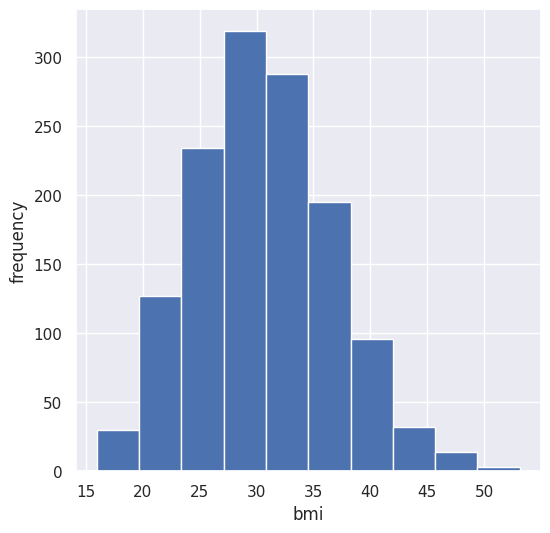

In [ ]:
plt.hist(insurance["bmi"])
plt.xlabel("bmi")
plt.ylabel("frequency")
#examined distribution of bmi. (bu grafikte hangi bmi'nin ne sıklıkla dağıldığını görüyoruz.)
#normal distribution

Text(0.5, 1.0, 'Relationship between smoker and charges')

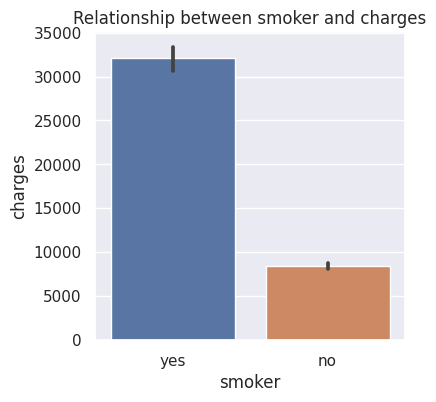

In [ ]:
plt.figure(figsize=(4,4))
sns.barplot(x="smoker",y="charges",data=insurance)
plt.title("Relationship between smoker and charges")
#Here we see that smokers pay much more non-smokers. (sigara içenlerin içmeyenlere göre daha fazla ödediğini görüyoruz.)

Text(0.5, 1.0, 'Relationship between region and smoker')

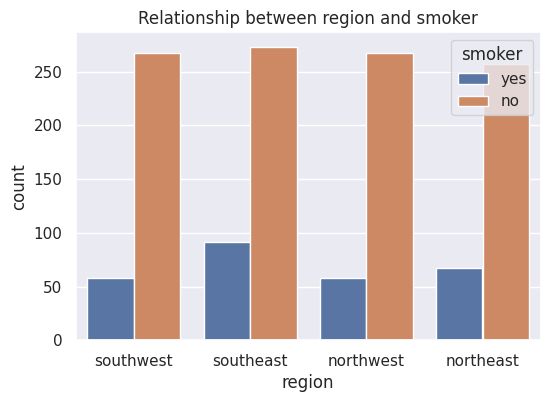

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x="region",data=insurance, hue="smoker")
plt.title("Relationship between region and smoker")
#this plot shows that the count of non-smokers more than smokers in all regions.
#the most smokers in southeast.

Text(0.5, 1.0, 'Relationship between sex and bmi')

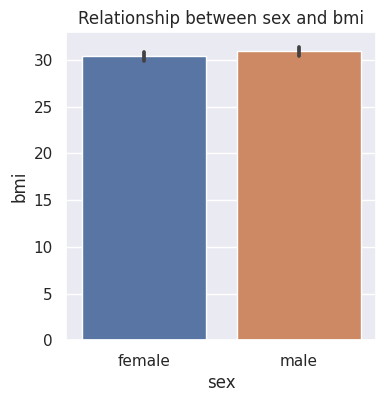

In [ ]:
plt.figure(figsize=(4,4))
sns.barplot(x="sex",y="bmi",data=insurance)
plt.title("Relationship between sex and bmi")

In [ ]:
sex=insurance.groupby("sex",as_index=False)["bmi"].mean()
sex
#after founding mean of bmi.That shows us truth of up barplot.

,sex,bmi
0,female,30.377749
1,male,30.943129


<Axes: xlabel='region', ylabel='children'>

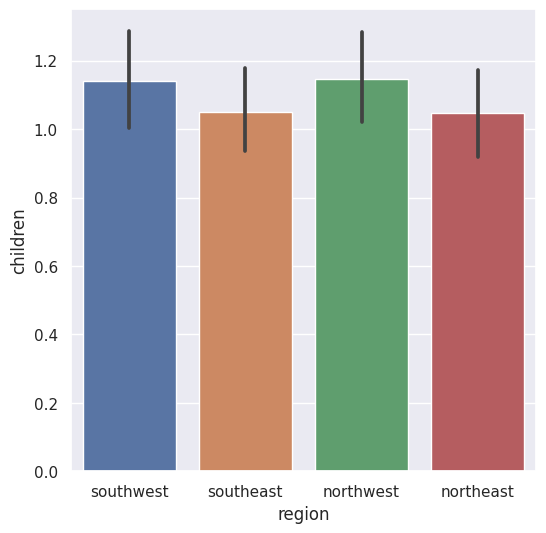

In [ ]:
sns.barplot(x="region", y="children", data=insurance)
#the most children are in northwest

<Axes: xlabel='age', ylabel='bmi'>

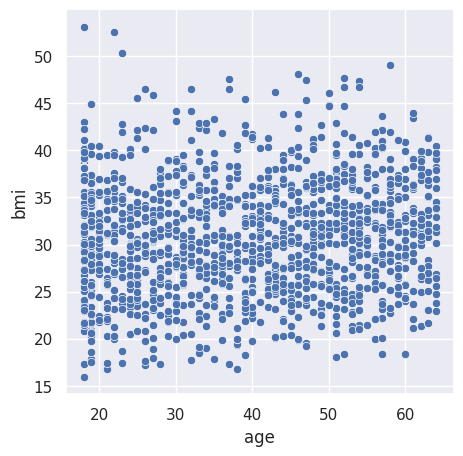

In [ ]:
plt.figure(figsize=(5,5))
sns.scatterplot(x="age" , y="bmi", data=insurance)
#this scatter plot shows some young persons have high bmi.

Text(0.5, 1.0, 'Relationship between children and bmi')

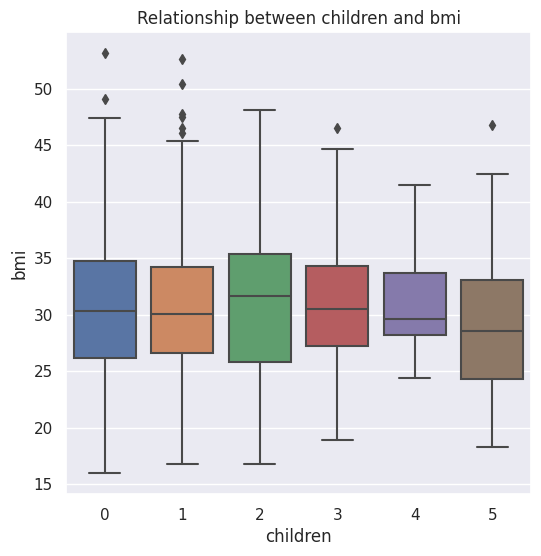

In [ ]:
sns.boxplot(x="children", y="bmi", data=insurance)
plt.title("Relationship between children and bmi")
#who have 2 children has may more bmi.
#there are points outside the observations so there is outlier in the bmi varible.
#(boxplot dışında noktalar var bu da outlier olduğunu gösterir.)
#(örneğin 1 çocukluya baktığımzda gözlem dışında veriler olduğunu görüyoruz.)

Text(0.5, 1.0, 'relationship between bmi and charges')

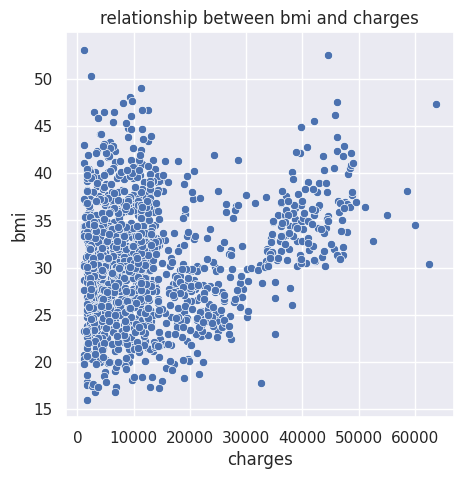

In [ ]:
plt.figure(figsize=(5,5))
sns.scatterplot(x="charges" , y="bmi", data=insurance)
plt.title("relationship between bmi and charges")
#as it seen when bmi is its mean point charges may rise.
#bmi ortalama değerinde daha fazla ödeme yapılıyor.

Text(0.5, 1.0, 'relationship between region-bmi-smoker')

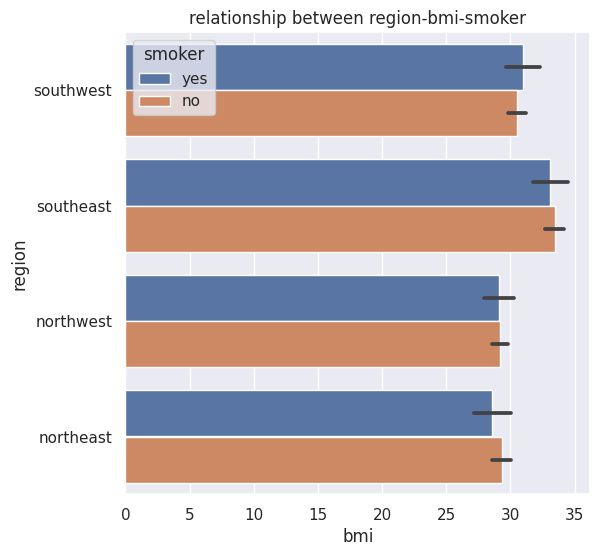

In [ ]:
sns.barplot(x="bmi", y="region", hue="smoker",data=insurance)
plt.title("relationship between region-bmi-smoker")

<Axes: xlabel='bmi'>

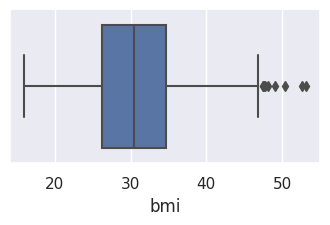

In [ ]:
#using boxplot which value is outlier. For example;
plt.figure(figsize=(4,2))
sns.boxplot(x="bmi", data=insurance)

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [11]:
# test train split for supervised training
X_train,X_test,y_train,y_test = train_test_split( insurance.bmi, insurance.charges)

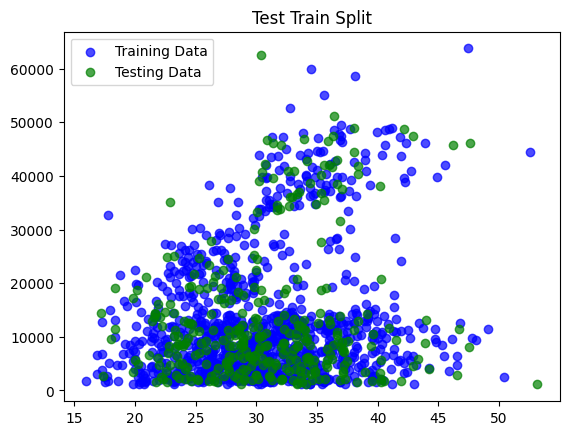

In [12]:
# test train split visualization
plt.scatter(X_train,y_train, label='Training Data', color='b',alpha=.7)
plt.scatter(X_test,y_test, label='Testing Data',color='g',alpha=.7)
plt.legend()
plt.title("Test Train Split")
plt.show()

In [20]:
# create linear model and train it
Lr=LinearRegression()
Lr.fit(X_train.values.reshape(-1,1), y_train.values)

LinearRegression()

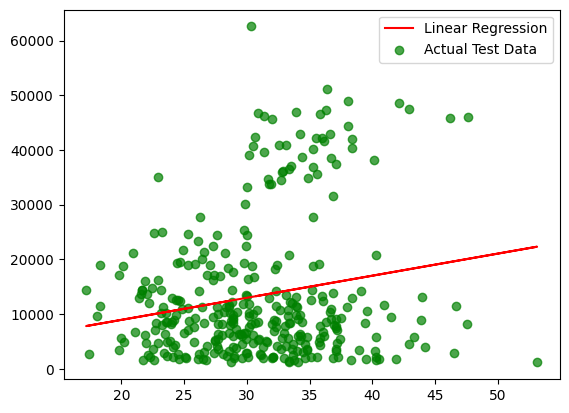

In [14]:
# use model to predict on Test Data
prediction= Lr.predict(X_test.values.reshape(-1,1))

# plot prediction line against actual test data
plt.plot(X_test, prediction, label='Linear Regression', color='r' )
plt.scatter(X_test, y_test, label='Actual Test Data',color='g', alpha=.7)
plt.legend()
plt.show()

In [15]:
# predict charge of bmi is 40
Lr.predict(np.array([[40]]))[0]

17008.165090743234

In [16]:
# score this model
Lr.score(X_test.values.reshape(-1,1), y_test.values)

0.02885545704849135

low accuracy score (near 0) indicates that the model needs to be improved

In [3]:
from sklearn.linear_model import LogisticRegression

In [ ]:
insurance.sample(7)

,age,sex,bmi,children,smoker,region,charges
909,32,female,24.600,0,yes,southwest,17496.30600
1025,21,female,34.600,0,no,southwest,2020.17700
1151,58,female,36.480,0,no,northwest,12235.83920
28,23,male,17.385,1,no,northwest,2775.19215
1061,57,male,27.940,1,no,southeast,11554.22360
1282,18,female,21.660,0,yes,northeast,14283.45940
952,30,female,28.405,1,no,northwest,4527.18295


In [ ]:
# Feature Engineering (one hot encoding)
insurance=pd.get_dummies(insurance, drop_first=True)
insurance.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [ ]:
#Test train split
X_train, X_test, y_train, y_test = train_test_split(insurance.drop('smoker_yes',axis=1), insurance['smoker_yes'])


In [ ]:
#Train the model using training data
LogReg= LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#score the model
LogReg.score(X_test, y_test)

0.9313432835820895

so it is a good model :)

In [ ]:
LogReg.predict(np.array([[21,32,0,14000,0,0,0,0]]))[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0

the logistic regression may not practical for this data

In [ ]:
# KNN REGRESSION MODEL

In [5]:
y = insurance.age
X = insurance.drop(["age"], axis = 1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test)

In [ ]:
knn.score(X_test, y_test)

0.7489737840447969

In [ ]:
knn_predict = knn.predict(X_test)
df_KNNRegressor = pd.DataFrame({'Actual': y_test, 'Predicted': knn_predict})
df_KNNRegressor.sample(5)

,Actual,Predicted
585,33,33.6
955,31,27.6
694,27,24.4
74,44,43.0
450,39,43.0


In [ ]:
#  MODEL EVALUATION

In [ ]:
from sklearn import metrics

print('Mean Absolute Error -->', metrics.mean_absolute_error(y_test, knn_predict))

Mean Absolute Error --> 4.530597014925372


In [ ]:
print('Mean Squared Error -->', metrics.mean_squared_error(y_test, knn_predict))

Mean Squared Error --> 51.650000000000006


In [ ]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
X_train_scaled = minmax.fit_transform(X_train)
X_test_scaled = minmax.transform(X_test)